<a href="https://colab.research.google.com/github/Adelaaas/Data_science_basic_23-24_1/blob/main/pupurupu_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

ss = pd.read_csv('/content/drive/MyDrive/sample_submition.csv')
tsd = pd.read_csv('/content/drive/MyDrive/test_data.csv')
trd = pd.read_csv('/content/drive/MyDrive/train_data.csv')

trd

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
2,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
3,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
4,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,"8,87",6,"3,55",21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,1410.0,Trouble,1965.0,2,4,45,4,3255,"3,79",20339,"1,05",4962.0,Roll / Spin and Move,Children's Games
15253,16398.0,War,0.0,2,2,30,4,1340,"2,28",20340,1,427.0,NaN,Children's Games
15254,5048.0,Candy Land,1949.0,2,4,30,3,4006,"3,18",20342,"1,08",5788.0,Roll / Spin and Move,Children's Games
15255,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,"2,86",20343,"1,02",4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


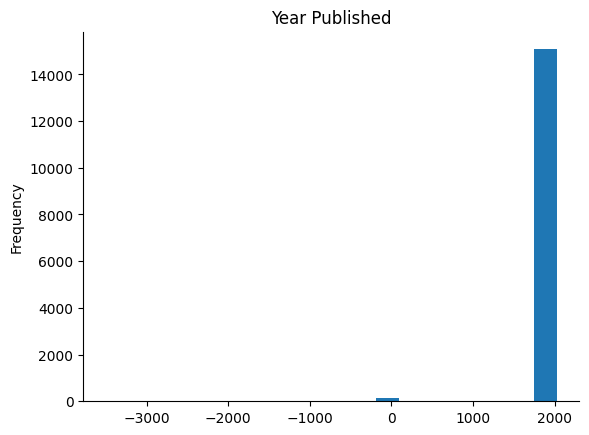

In [ ]:
# @title Year Published

from matplotlib import pyplot as plt
trd['Year Published'].plot(kind='hist', bins=20, title='Year Published')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
s = trd.isna().sum()/len(trd)
s

ID                    0.000655
Name                  0.000000
Year Published        0.000066
Min Players           0.000000
Max Players           0.000000
Play Time             0.000000
Min Age               0.000000
Users Rated           0.000000
Rating Average        0.000000
BGG Rank              0.000000
Complexity Average    0.000000
Owned Users           0.001114
Mechanics             0.078652
Domains               0.501344
dtype: float64

это отношение NANов к общему кол-ву

In [ ]:
trd['Owned Users'] = trd['Owned Users'].fillna('0')
trd['Mechanics'] = trd['Mechanics'].fillna('0')
trd['ID'] = trd['ID'].fillna('0')
trd['Year Published'] = trd['Year Published'].fillna('0')
trd['Domains'] = trd['Domains'].fillna('0')

tsd['Owned Users'] = tsd['Owned Users'].fillna('0')
tsd['Mechanics'] = tsd['Mechanics'].fillna('0')
tsd['ID'] = tsd['ID'].fillna('0')
tsd['Year Published'] = tsd['Year Published'].fillna('0')
tsd['Domains'] = tsd['Domains'].fillna('0')


In [ ]:
trd.dtypes

ID                    object
Name                  object
Year Published        object
Min Players            int64
Max Players            int64
Play Time              int64
Min Age                int64
Users Rated            int64
Rating Average        object
BGG Rank               int64
Complexity Average    object
Owned Users           object
Mechanics             object
Domains               object
dtype: object

In [ ]:
tsd

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
1,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,10,"3,59",56219.0,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames"
2,115746.0,War of the Ring: Second Edition,2012.0,2,4,180,13,13725,12,"4,14",22281.0,"Area Majority / Influence, Area Movement, Camp...","Thematic Games, Wargames"
3,169786.0,Scythe,2016.0,1,5,115,14,57871,14,"3,41",75640.0,"Area Majority / Influence, Card Play Conflict ...",Strategy Games
4,28720.0,Brass: Lancashire,2007.0,2,4,120,14,19400,19,"3,86",25429.0,"Hand Management, Income, Loans, Network and Ro...",Strategy Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,6932.0,Hi Ho! Cherry-O,1960.0,2,4,10,3,1035,20325,"1,03",1691.0,"Cooperative Game, Roll / Spin and Move",Children's Games
5082,3510.0,Battle of the Sexes,1997.0,2,8,45,12,1090,20328,"1,08",1987.0,Team-Based Game,Party Games
5083,5895.0,Hungry Hungry Hippos,1978.0,2,4,10,4,2361,20330,"1,05",2568.0,0,Children's Games
5084,2679.0,Mouse Trap,1963.0,2,4,30,6,2693,20333,"1,11",3408.0,Roll / Spin and Move,Children's Games


In [ ]:
trd['Rating Average']=trd['Rating Average'].str.replace(',', '.', 15256)
trd['Rating Average']=trd['Rating Average'].astype(float)
trd['Complexity Average']=trd['Complexity Average'].str.replace(',','.')
trd['Complexity Average']=trd['Complexity Average'].astype(float)

#tsd['Rating Average']=tsd['Rating Average'].str.replace(',', '.', 15256)
#tsd['Rating Average']=tsd['Rating Average'].astype(float)
tsd['Complexity Average']=tsd['Complexity Average'].str.replace(',','.')
tsd['Complexity Average']=tsd['Complexity Average'].astype(float)

по факту же нам имя не нужно же да?

остальное придется кодировать

и ещё, а че у меня год -200?(это же до н.э., да?)


In [ ]:
trd['Year Published'].unique()

array([2017.0, 2018.0, 2016.0, 2020.0, 2015.0, 2011.0, 2012.0, 2013.0,
       2019.0, 2014.0, 2002.0, 2007.0, 2004.0, 2008.0, 2006.0, 2010.0,
       1876.0, 2005.0, 1995.0, 2009.0, 1982.0, 1999.0, 1993.0, 1991.0,
       -2200.0, 1986.0, 1998.0, 1992.0, 2000.0, 1964.0, 1997.0, 1985.0,
       2003.0, 1475.0, 1994.0, 2001.0, 1990.0, 1983.0, 1989.0, 1959.0,
       1800.0, 1996.0, 0.0, 1980.0, 1977.0, 1971.0, 1978.0, 1587.0,
       1981.0, 762.0, 1973.0, 1974.0, 1962.0, 2021.0, 1988.0, 1979.0,
       1987.0, 1903.0, 1938.0, 1947.0, 1984.0, 1960.0, 1850.0, 1810.0,
       1972.0, 1976.0, 1906.0, 1967.0, 1745.0, 1864.0, 1946.0, 1883.0,
       1965.0, 1975.0, 1966.0, 1425.0, 1701.0, 1969.0, 1939.0, 1942.0,
       1909.0, 1904.0, 1932.0, 1963.0, 1970.0, 1968.0, 1780.0, 1921.0,
       1663.0, 1956.0, 1951.0, 1600.0, 550.0, 1930.0, 1885.0, 1955.0,
       1860.0, 700.0, 1796.0, 1887.0, 1889.0, 1953.0, 1958.0, 1954.0,
       1802.0, -3500.0, 1937.0, 1700.0, 1892.0, 2022.0, 1943.0, 1824.0,
       100

In [ ]:
trd['Year Published'] = trd['Year Published'].apply(lambda x: int(x))
tsd['Year Published'] = tsd['Year Published'].apply(lambda x: int(x))

In [ ]:
trd['Year Published'] = trd['Year Published'].apply(lambda x: 2024 - x )
tsd['Year Published'] = tsd['Year Published'].apply(lambda x: 2024 - x )

In [ ]:
trd1 = trd


trd_gd = trd1['Mechanics'].str.get_dummies(sep=', ')
trd1 = pd.concat([trd1.drop(columns=['Mechanics']), trd_gd], axis=1)
tsd_gd = tsd['Mechanics'].str.get_dummies(sep=', ')
tsd = pd.concat([tsd.drop(columns=['Mechanics']), tsd_gd], axis=1)


trd_gd = trd1['Domains'].str.get_dummies(sep=', ')
trd1 = pd.concat([trd1.drop(columns=['Domains']), trd_gd], axis=1)
tsd_gd = tsd['Domains'].str.get_dummies(sep=', ')
tsd = pd.concat([tsd.drop(columns=['Domains']), tsd_gd], axis=1)

In [ ]:
'''
le = preprocessing.LabelEncoder()


le.fit(trd['Complexity Average'])
trd['Complexity Average'] = le.transform(trd['Complexity Average'])
le.fit(tsd['Complexity Average'])
tsd['Complexity Average'] = le.transform(tsd['Complexity Average'])


df_gd = df1['Mechanics'].str.get_dummies(sep=', ')
df1 = pd.concat([df1.drop(columns=['Mechanics']), df_gd], axis=1)


le.fit(trd['Mechanics'])
trd['Mechanics'] = le.transform(trd['Mechanics'])
le.fit(tsd['Mechanics'])
tsd['Mechanics'] = le.transform(tsd['Mechanics'])'''


In [ ]:
trd1

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,...,Zone of Control,0,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,174430.0,Gloomhaven,7,1,4,120,14,42055,8.79,1,...,0,0,0,0,0,0,0,1,1,0
1,224517.0,Brass: Birmingham,6,2,4,120,14,19217,8.66,3,...,0,0,0,0,0,0,0,1,0,0
2,167791.0,Terraforming Mars,8,1,5,120,12,64864,8.43,4,...,0,0,0,0,0,0,0,1,0,0
3,233078.0,Twilight Imperium: Fourth Edition,7,3,6,480,14,13468,8.70,5,...,0,0,0,0,0,0,0,1,1,0
4,291457.0,Gloomhaven: Jaws of the Lion,4,1,4,120,14,8392,8.87,6,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,1410.0,Trouble,59,2,4,45,4,3255,3.79,20339,...,0,0,0,1,0,0,0,0,0,0
15253,16398.0,War,2024,2,2,30,4,1340,2.28,20340,...,0,0,0,1,0,0,0,0,0,0
15254,5048.0,Candy Land,75,2,4,30,3,4006,3.18,20342,...,0,0,0,1,0,0,0,0,0,0
15255,5432.0,Chutes and Ladders,2224,2,6,30,3,3783,2.86,20343,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
x = trd1.drop(['ID', 'Name', 'Rating Average', '0'], axis=1)
x = x.drop(['0'])
y = trd1['Rating Average']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

TypeError: 'tuple' object is not callable

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))



Mean Absolute Error:  0.4053229831498263
Mean Squared Error:  0.3165904712992567
R2:  0.6610075203356665


In [ ]:
tsd

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,...,Zone of Control,0,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,161936.0,Pandemic Legacy: Season 1,9,2,4,60,13,41643,2,2.84,...,0,0,0,0,0,0,0,1,1,0
1,12333.0,Twilight Struggle,19,2,2,180,13,40814,10,3.59,...,0,0,0,0,0,0,0,1,0,1
2,115746.0,War of the Ring: Second Edition,12,2,4,180,13,13725,12,4.14,...,0,0,0,0,0,0,0,0,1,1
3,169786.0,Scythe,8,1,5,115,14,57871,14,3.41,...,0,0,0,0,0,0,0,1,0,0
4,28720.0,Brass: Lancashire,17,2,4,120,14,19400,19,3.86,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,6932.0,Hi Ho! Cherry-O,64,2,4,10,3,1035,20325,1.03,...,0,0,0,1,0,0,0,0,0,0
5082,3510.0,Battle of the Sexes,27,2,8,45,12,1090,20328,1.08,...,0,0,0,0,0,0,1,0,0,0
5083,5895.0,Hungry Hungry Hippos,46,2,4,10,4,2361,20330,1.05,...,0,0,0,1,0,0,0,0,0,0
5084,2679.0,Mouse Trap,61,2,4,30,6,2693,20333,1.11,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
mmsc = MinMaxScaler()
columns1=['Play Time','Users Rated','BGG Rank','Year Published','Users Rated']
trd1[columns1] = mmsc.fit_transform(trd1[columns1]) # type - numpy array
tsd[columns1] = mmsc.fit_transform(tsd[columns1]) # type - numpy array

#x = trd1.drop(['ID', 'Name', 'Rating Average'], axis=1)
y = trd1['Rating Average']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model2 = LinearRegression()
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)


print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))



Mean Absolute Error:  0.40987392749741397
Mean Squared Error:  0.31362269825558214
R2:  0.6493912193324176


In [ ]:
#x = trd1.drop(['ID', 'Name', 'Rating Average'], axis=1)
y = trd1['Rating Average']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.neighbors import KNeighborsRegressor #
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

scores = []

for i in range(1,40):
    score = {}
    knn = KNeighborsRegressor(i)
    knn.fit(x_train, y_train)
    answers = knn.predict(x_test)

    score['k'] = i
    score['MAE'] = mean_absolute_error(answers, y_test)
    score['MSE'] = mean_squared_error(answers,y_test)
    score['R2'] = r2_score(answers,y_test)

    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,MAE,MSE,R2
0,1,0.245085,0.163679,0.809757
1,2,0.222105,0.139140,0.831166
2,3,0.215601,0.127142,0.843509
3,4,0.211474,0.121048,0.849574
4,5,0.209543,0.119461,0.849859
5,6,0.210255,0.120844,0.846542
6,7,0.210866,0.120183,0.845695
7,8,0.211924,0.120169,0.844628
8,9,0.211740,0.119440,0.845049
9,10,0.211397,0.119562,0.843460


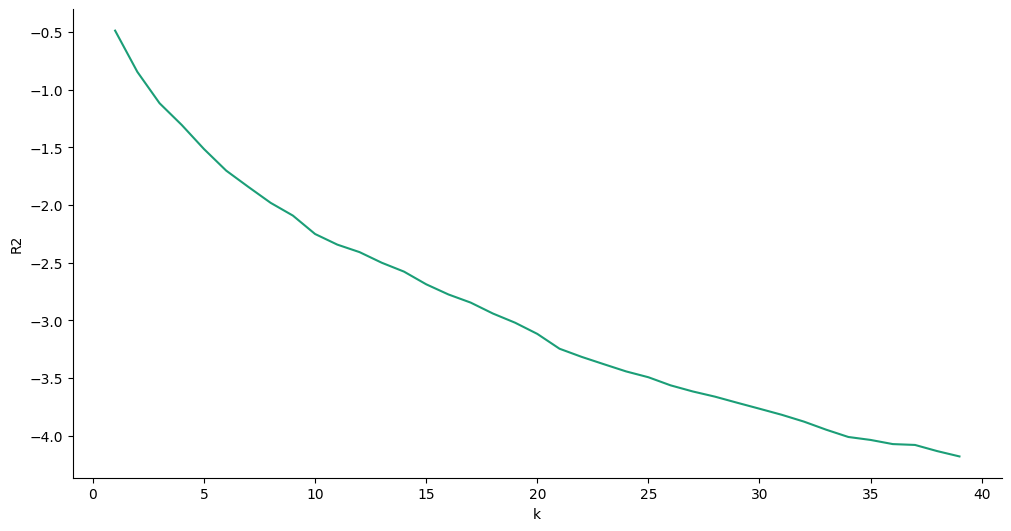

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['R2']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = scores.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('R2')

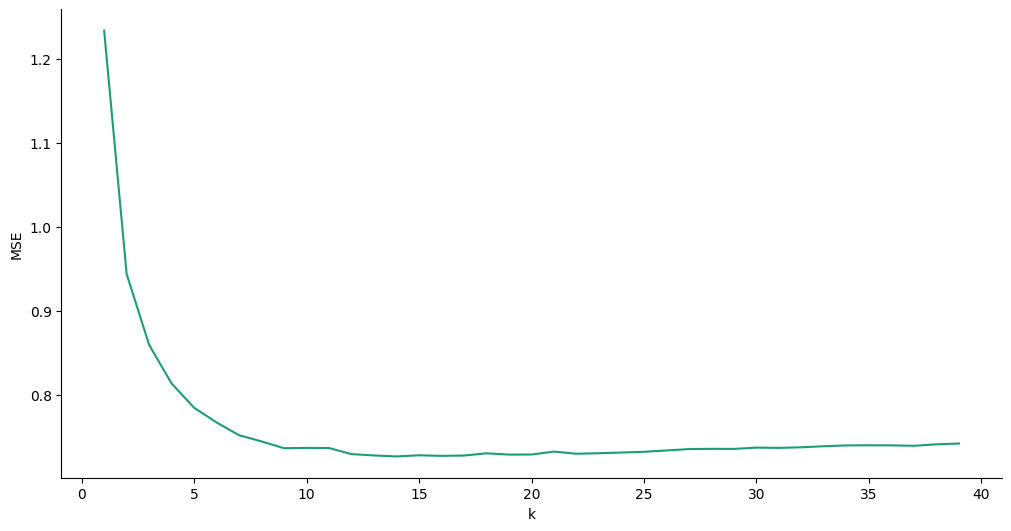

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['MSE']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = scores.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('MSE')

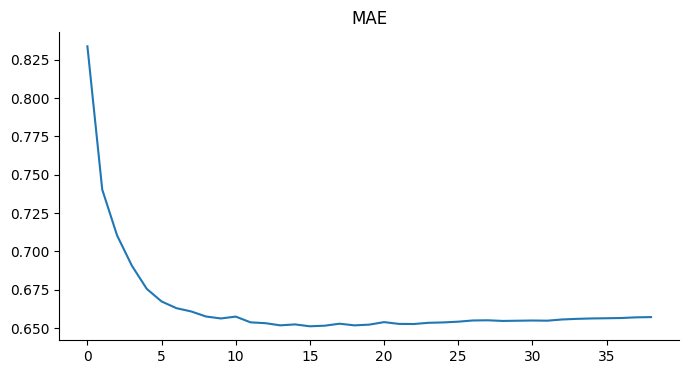

In [ ]:
from matplotlib import pyplot as plt
scores['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

i = 5 #в районе 4 еще лучше кстати

knn = KNeighborsRegressor(i)
knn.fit(x_train, y_train)
answers = knn.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(answers, y_test))
print('Mean Squared Error:', mean_squared_error(answers,y_test))
print('R2 score:', r2_score(answers,y_test))

Mean Absolute Error: 0.20954325032765403
Mean Squared Error: 0.11946149541284405
R2 score: 0.8498586244002613


In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=4, random_state=1)

reg.fit(x_train, y_train)
y_pred_tree = reg.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_pred_tree, y_test))
print('Mean Squared Error:', mean_squared_error(y_pred_tree, y_test))
print('R2 score:', r2_score(y_pred_tree, y_test))


Mean Absolute Error: 0.3675038465973712
Mean Squared Error: 0.2517719831662468
R2 score: 0.6254697927072754


In [ ]:
tsd = tsd.drop(['ID', 'Name'], axis=1)
tsd

,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,0,...,Zone of Control,0,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,0.001195,2,4,0.004167,13,0.408680,0.000000,2.84,65294.0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.003187,2,2,0.012500,13,0.400538,0.000393,3.59,56219.0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.001792,2,4,0.012500,13,0.134498,0.000492,4.14,22281.0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.000996,1,5,0.007986,14,0.568054,0.000590,3.41,75640.0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.002788,2,4,0.008333,14,0.190232,0.000836,3.86,25429.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,0.012149,2,4,0.000694,3,0.009870,0.999213,1.03,1691.0,0,...,0,0,0,1,0,0,0,0,0,0
5082,0.004780,2,8,0.003125,12,0.010410,0.999361,1.08,1987.0,0,...,0,0,0,0,0,0,1,0,0,0
5083,0.008564,2,4,0.000694,4,0.022893,0.999459,1.05,2568.0,1,...,0,0,0,1,0,0,0,0,0,0
5084,0.011551,2,4,0.002083,6,0.026153,0.999607,1.11,3408.0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=4, random_state=1)

reg.fit(x_train, y_train)
y_pred_tree = reg.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_pred_tree, y_test))
print('Mean Squared Error:', mean_squared_error(y_pred_tree, y_test))
print('R2 score:', r2_score(y_pred_tree, y_test))


Mean Absolute Error: 0.3675038465973712
Mean Squared Error: 0.2517719831662468
R2 score: 0.6254697927072754


In [ ]:
new_columns = ['Auction: English', 'Auction: Once Around', 'Closed Economy Auction',
       'Different Dice Movement', 'Hot Potato', 'Multiple-Lot Auction',
       'Turn Order: Random']

for column in new_columns:
    tsd[column] = 0



In [ ]:
new_columns_order = x.columns.tolist()

tsd = tsd[new_columns_order]
test = tsd

In [ ]:
common_columns = x.columns.intersection(test.columns)
unique_columns_df1 = x.columns.difference(test.columns)
unique_columns_df2 = test.columns.difference(x.columns)



In [ ]:
print("Общие столбцы:")
print(common_columns)
print("\nУникальные столбцы в x:")
print(unique_columns_df1)
print("\nУникальные столбцы в test:")
print(unique_columns_df2)

Общие столбцы:
Index(['Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age',
       'Users Rated', 'BGG Rank', 'Complexity Average', 'Owned Users',
       'Acting',
       ...
       'Worker Placement with Dice Workers', 'Zone of Control',
       'Abstract Games', 'Children's Games', 'Customizable Games',
       'Family Games', 'Party Games', 'Strategy Games', 'Thematic Games',
       'Wargames'],
      dtype='object', length=199)

Уникальные столбцы в x:
Index([], dtype='object')

Уникальные столбцы в test:
Index([], dtype='object')


In [ ]:

new_columns = ['Auction: English', 'Auction: Once Around', 'Closed Economy Auction',
       'Different Dice Movement', 'Hot Potato', 'Multiple-Lot Auction',
       'Turn Order: Random']

for column in new_columns:
    test[column] = 0


new_columns_order = x.columns.tolist()

test = test[new_columns_order]

In [ ]:
test = test.drop(columns=['0'])
test = test.loc[:, ~test.columns.duplicated()]

In [ ]:
#x = x.drop(columns=['0'])
#test = test.drop(columns=['0'])
for v in range(198):
  print(x.columns[v], "--",  test.columns[v])


Year Published -- Year Published
Min Players -- Min Players
Max Players -- Max Players
Play Time -- Play Time
Min Age -- Min Age
Users Rated -- Users Rated
BGG Rank -- BGG Rank
Complexity Average -- Complexity Average
Owned Users -- Owned Users
Acting -- Acting
Action Drafting -- Action Drafting
Action Points -- Action Points
Action Queue -- Action Queue
Action Retrieval -- Action Retrieval
Action Timer -- Action Timer
Action/Event -- Action/Event
Advantage Token -- Advantage Token
Alliances -- Alliances
Area Majority / Influence -- Area Majority / Influence
Area Movement -- Area Movement
Area-Impulse -- Area-Impulse
Auction/Bidding -- Auction/Bidding
Auction: Dexterity -- Auction: Dexterity
Auction: Dutch -- Auction: Dutch
Auction: Dutch Priority -- Auction: Dutch Priority
Auction: English -- Auction: English
Auction: Fixed Placement -- Auction: Fixed Placement
Auction: Once Around -- Auction: Once Around
Auction: Sealed Bid -- Auction: Sealed Bid
Auction: Turn Order Until Pass -- Auc

In [ ]:
common_columns = x.columns.intersection(test.columns)
unique_columns_df1 = x.columns.difference(test.columns)
unique_columns_df2 = test.columns.difference(x.columns)

# Проверка всех столбцов в DataFrame с помощью списка столбцов
print("x", len(x.columns))
print("tsd", len(test.columns))

# Проверка всех столбцов в списке общих столбцов
print("общие:", len(common_columns))


x 199
tsd 199
общие: 199


In [ ]:
# Допустим после model.predict(test) вы сохранили результаты в переменную test_pred
# Как сохранить в файл с ответами

test_pred = reg.predict(test)

my_submition = pd.DataFrame(test_pred, columns=['Rating Average'])

my_submition.reset_index().to_csv('result.csv', index=False)